In [24]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12,6)


In [25]:
#load dataset
from google.colab import files
uploaded = files.upload()


Saving retail_sales_dataset.csv to retail_sales_dataset (1).csv


In [26]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [28]:
#Clean column names
df.columns = [c.replace(" ", "_").lower() for c in df.columns]
df.head()


,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [29]:
#Summary of data
df.info()
df.describe().T
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,0
transaction_id,1000
date,345
customer_id,1000
gender,2
age,47
product_category,3
quantity,4
price_per_unit,5
total_amount,18


In [30]:
#Convert Date column
df["date"] = pd.to_datetime(df["date"], errors="coerce")

#Extract useful features
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["month_name"] = df["date"].dt.month_name()
df["weekday"] = df["date"].dt.day_name()
df["order_month"] = df["date"].dt.to_period('M').dt.to_timestamp()




In [31]:
# cell 7 data integrity checks
# check that total_amount equals quantity times price per unit
if "price_per_unit" in df.columns and "quantity" in df.columns and "total_amount" in df.columns:
    df["recalc_total"] = df["quantity"] * df["price_per_unit"]
    mismatch = (df["recalc_total"] != df["total_amount"]).sum()
    print("rows where total_amount does not match quantity times price_per_unit", mismatch)
    # inspect a few mismatches
    display(df.loc[df["recalc_total"] != df["total_amount"], ["transaction_id","quantity","price_per_unit","total_amount","recalc_total"]].head())
else:
    print("price or quantity or total amount column missing")


rows where total_amount does not match quantity times price_per_unit 0


,transaction_id,quantity,price_per_unit,total_amount,recalc_total


In [32]:
# cell 8 check duplicates and negative values
dup_count = df.duplicated(subset=["transaction_id"]).sum()
print("duplicate transaction id count", dup_count)

neg_quantity = (df["quantity"] <= 0).sum()
neg_price = (df["price_per_unit"] <= 0).sum()
print("non positive quantity count", neg_quantity)
print("non positive price per unit count", neg_price)


duplicate transaction id count 0
non positive quantity count 0
non positive price per unit count 0


Univariate Analysis (Single Column)

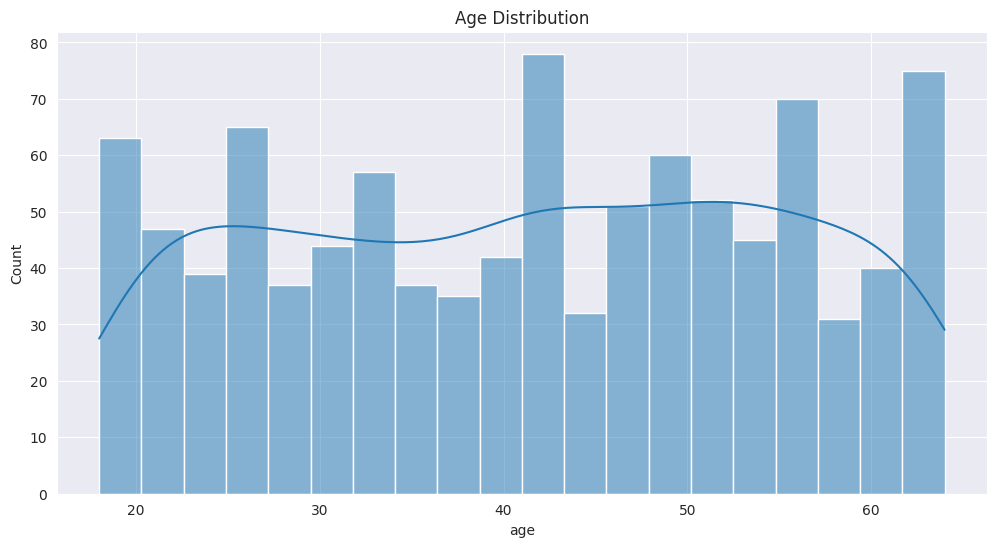

In [33]:
#Age distribution
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


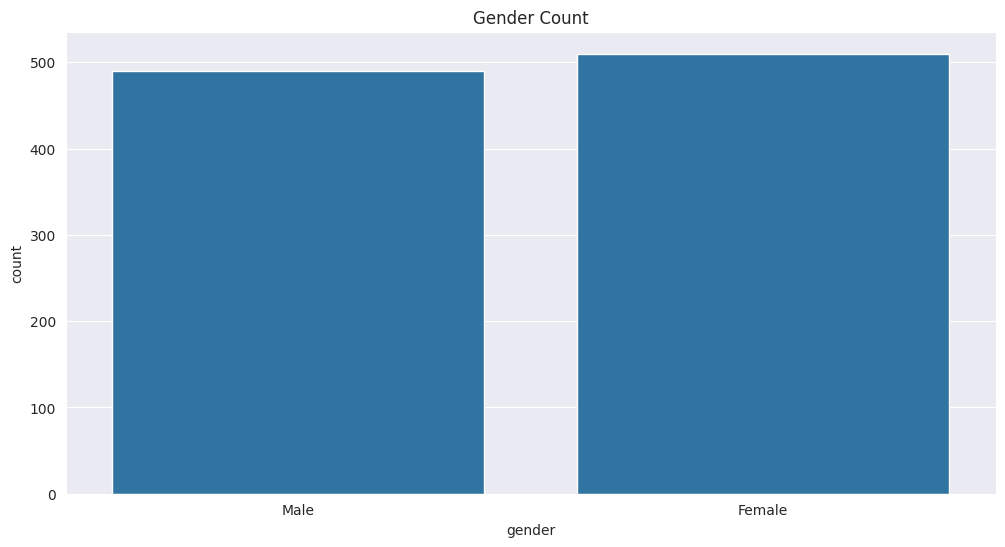

In [34]:
#Gender count
sns.countplot(x="gender", data=df)
plt.title("Gender Count")
plt.show()


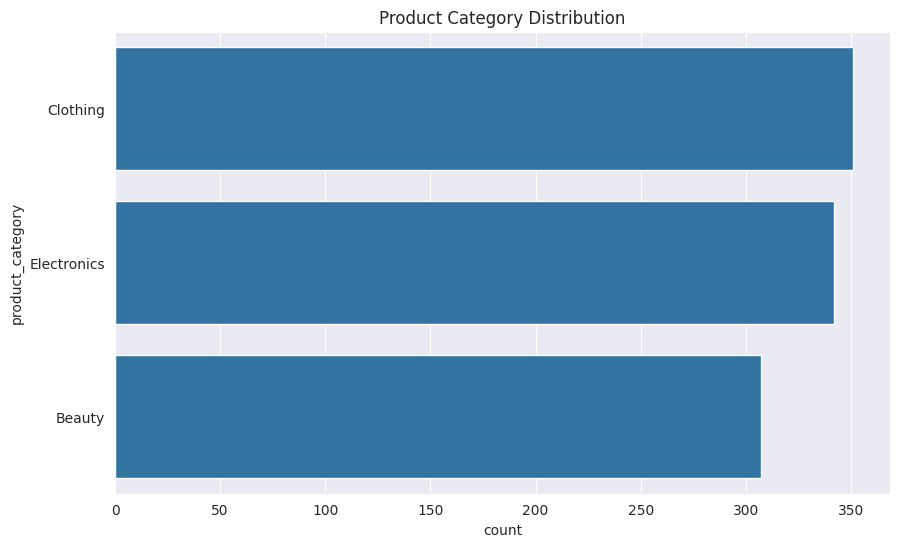

In [35]:
#Product category distribution
plt.figure(figsize=(10,6))
sns.countplot(y="product_category", data=df, order=df["product_category"].value_counts().index)
plt.title("Product Category Distribution")
plt.show()


Revenue Analysis

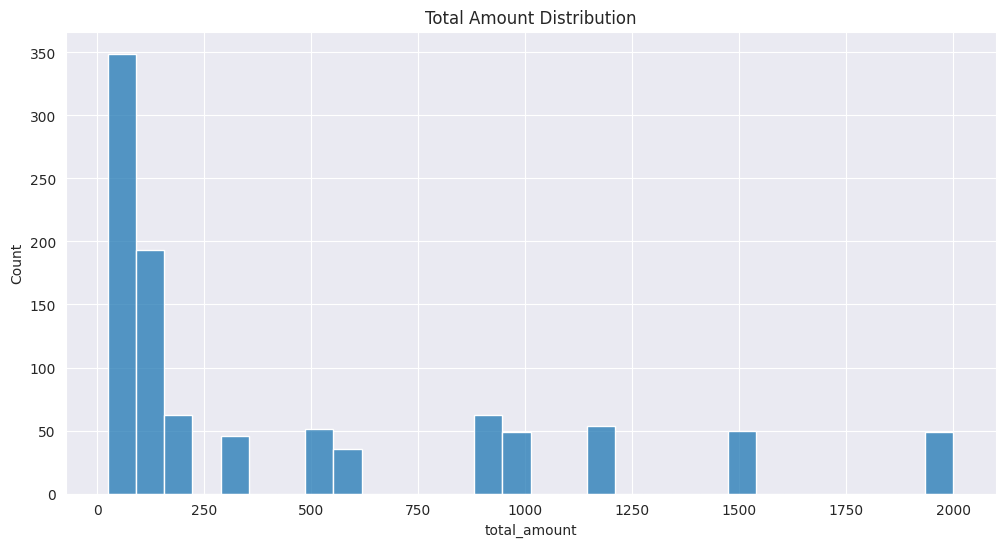

In [36]:
#Total revenue distribution
sns.histplot(df["total_amount"], bins=30)
plt.title("Total Amount Distribution")
plt.show()


In [ ]:
#Revenue by product category
plt.figure(figsize=(10,6))
df.groupby("product_category")["total_amount"].sum().sort_values().plot(kind="barh")
plt.title("Total Revenue by Product Category")
plt.xlabel("Revenue")
plt.show()


Time Series Analysis

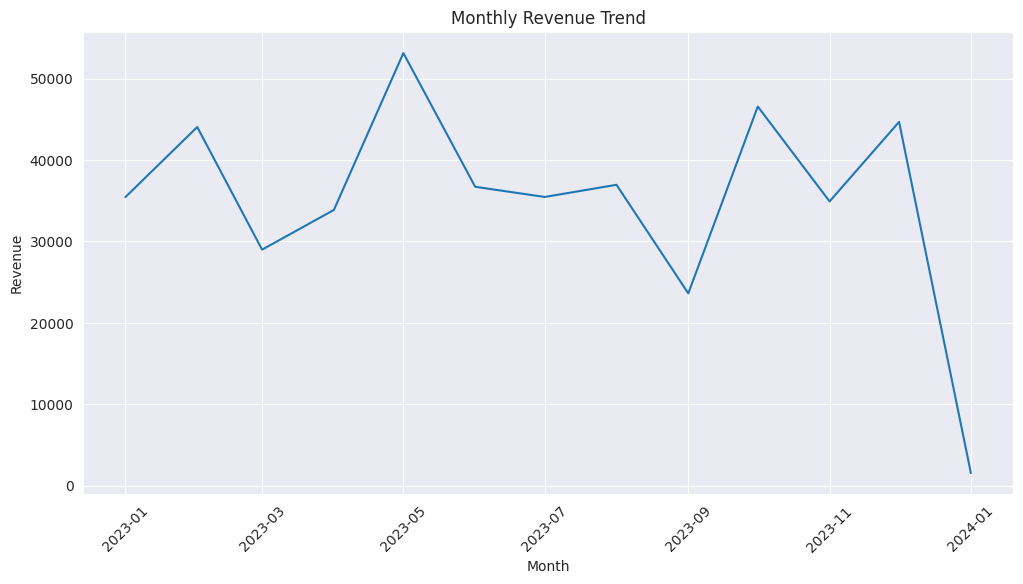

In [37]:
#Monthly revenue trend
monthly = df.groupby("order_month")["total_amount"].sum().reset_index()

sns.lineplot(x="order_month", y="total_amount", data=monthly)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


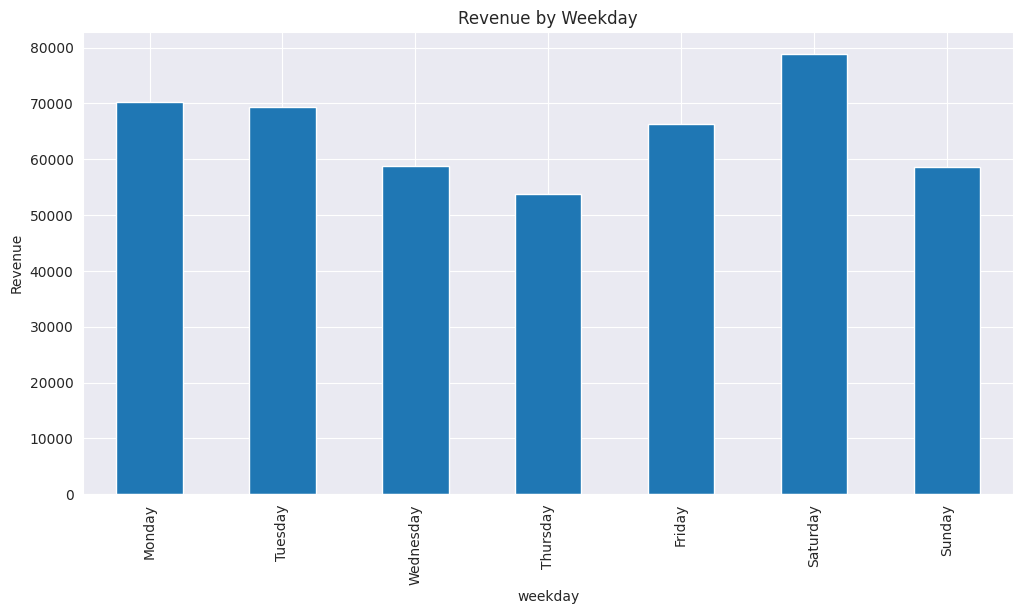

In [38]:
#Revenue by weekday
weekday = df.groupby("weekday")["total_amount"].sum().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

weekday.plot(kind="bar")
plt.title("Revenue by Weekday")
plt.ylabel("Revenue")
plt.show()


Bivariate Analysis

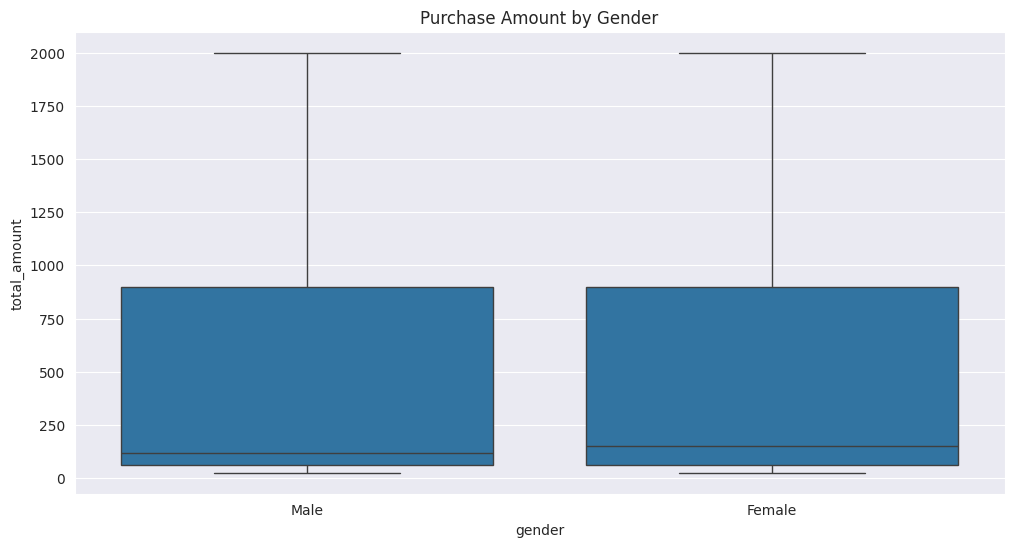

In [39]:
#Gender vs Total Amount
sns.boxplot(x="gender", y="total_amount", data=df)
plt.title("Purchase Amount by Gender")
plt.show()


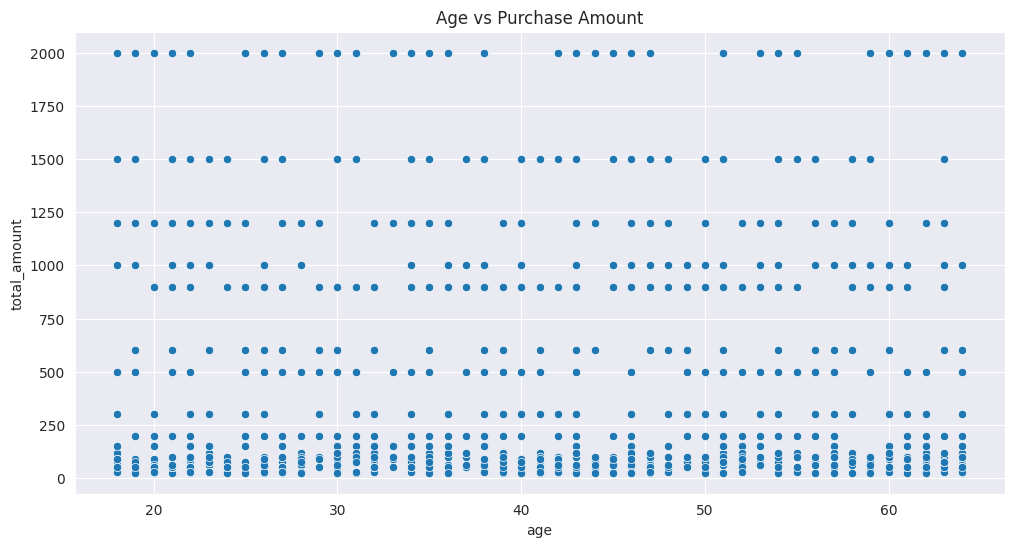

In [40]:
#Age vs Total Amount
sns.scatterplot(x="age", y="total_amount", data=df)
plt.title("Age vs Purchase Amount")
plt.show()


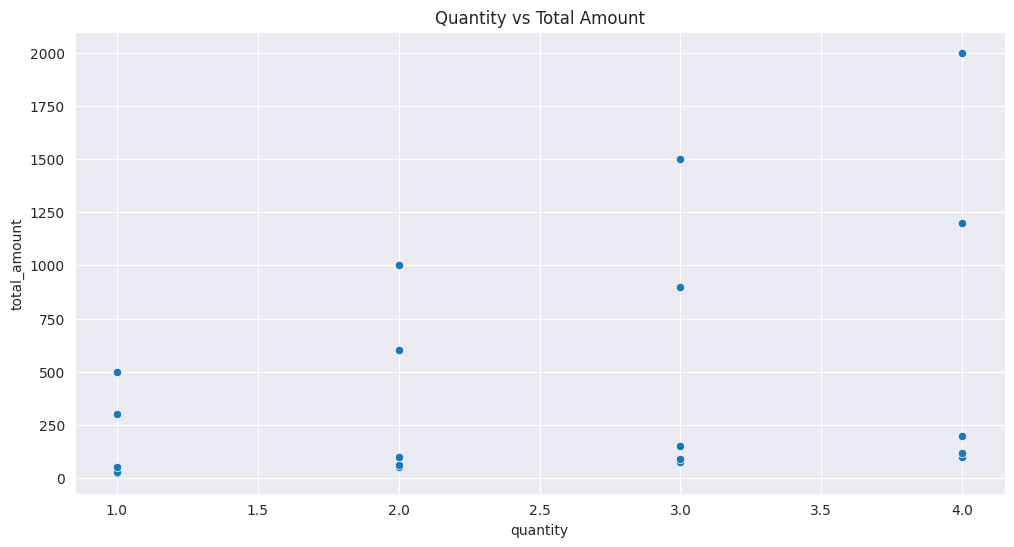

In [41]:
#Quantity vs Total Amount
sns.scatterplot(x="quantity", y="total_amount", data=df)
plt.title("Quantity vs Total Amount")
plt.show()


Customer Level Insights

In [42]:
#Total spend per customer
customer_rev = df.groupby("customer_id")["total_amount"].sum().sort_values(ascending=False)
customer_rev.head(10)


,total_amount
customer_id,
CUST015,2000
CUST412,2000
CUST970,2000
CUST547,2000
CUST281,2000
CUST416,2000
CUST420,2000
CUST927,2000
CUST447,2000


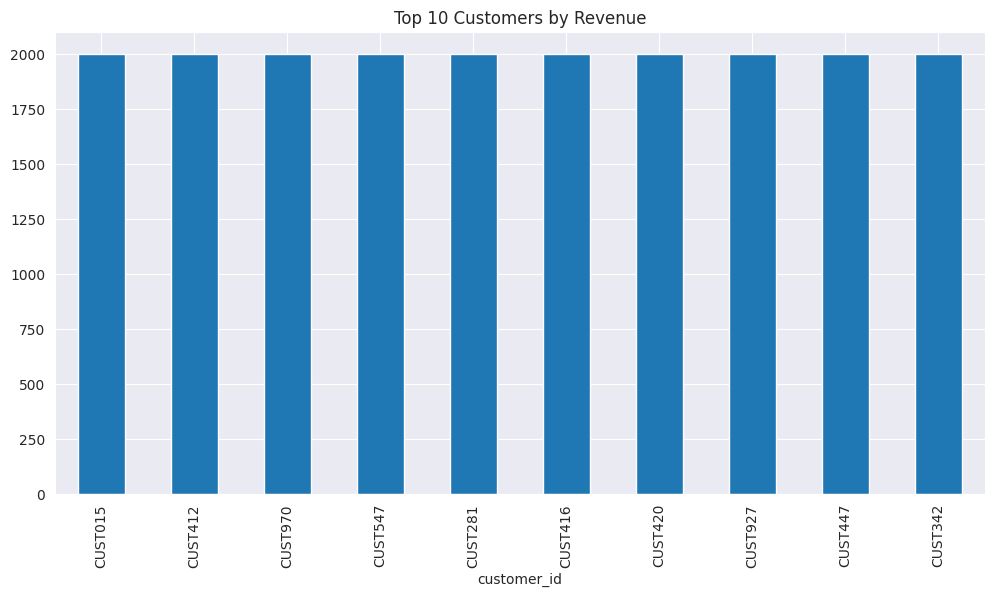

In [43]:
#Top 10 customers by revenue
customer_rev.head(10).plot(kind="bar")
plt.title("Top 10 Customers by Revenue")
plt.show()


In [44]:
# outlier detection and summary numbers
# simple IQR based outlier count for total amount
Q1 = df["total_amount"].quantile(0.25)
Q3 = df["total_amount"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_count = df[(df["total_amount"] < lower) | (df["total_amount"] > upper)].shape[0]
print("total amount outlier count", outlier_count)


total amount outlier count 0


In [45]:
# save cleaned dataset
# drop helper column if created
if "recalc_total" in df.columns:
    df = df.drop(columns=["recalc_total"])
df.to_csv("retail_sales_cleaned.csv", index=False)
print("cleaned file saved as retail_sales_cleaned.csv")


cleaned file saved as retail_sales_cleaned.csv
